### Necessary libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics 
import sklearn as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Preparing for classification

Loading the previously saved matrix containing feature vectors

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
features = np.load('/content/drive/MyDrive/SpeakerRecognition/features.npy', allow_pickle=True)
data = pd.read_csv('/content/drive/MyDrive/SpeakerRecognition/data.csv', sep=',') 

Combine features into one vector for each recording

In [116]:
all_features = []

for i in range(0, len(features)):
    all_features.append(np.concatenate((features[i][0], features[i][1], features[i][2],  features[i][3], features[i][4], features[i][5]), axis=0))

Setting the labels

In [117]:
labels = data['label']
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]))

In [118]:
X = np.array(all_features)
y = np.array(labels)

### Dataset division

For the needs of the learning process with the use of the neural network, the set was divided into training (60%), test (20%) and validation (20%). 

In [119]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=23)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=34) # 0.25 x 0.8 = 0.2

Hot encoding y

In [120]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
y_val = to_categorical(lb.fit_transform(y_val))

In [121]:
print(X_train.shape)
print(X_test.shape)

(285, 196)
(96, 196)


In [85]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Network model

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(196,), activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))  

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))  

model.add(Dense(34, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=30,
                          verbose=1)

In [ ]:
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                12608     
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 128)               8320      
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dropout_59 (Dropout)        (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 34)              

### Network learning process

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=200, 
                    batch_size = 3,
                    validation_data=(X_val, y_val),  
                    steps_per_epoch = 100, 
                    callbacks = [EarlyStop], 
                    validation_steps = 20)

Epoch 1/200
100/100 [==============================] - 2s 8ms/step - loss: 3.5984 - accuracy: 0.0333 - val_loss: 3.4083 - val_accuracy: 0.0667
Epoch 2/200
100/100 [==============================] - 1s 5ms/step - loss: 3.3545 - accuracy: 0.0933 - val_loss: 3.2061 - val_accuracy: 0.1500
Epoch 3/200
100/100 [==============================] - 1s 6ms/step - loss: 3.1325 - accuracy: 0.1433 - val_loss: 2.9846 - val_accuracy: 0.2667
Epoch 4/200
100/100 [==============================] - 1s 5ms/step - loss: 2.7952 - accuracy: 0.2567 - val_loss: 2.5779 - val_accuracy: 0.3333
Epoch 5/200
100/100 [==============================] - 1s 5ms/step - loss: 2.5507 - accuracy: 0.3100 - val_loss: 2.1157 - val_accuracy: 0.4833
Epoch 6/200
100/100 [==============================] - 1s 5ms/step - loss: 2.3233 - accuracy: 0.3733 - val_loss: 1.8462 - val_accuracy: 0.5500
Epoch 7/200
100/100 [==============================] - 0s 5ms/step - loss: 1.8917 - accuracy: 0.4433 - val_loss: 1.5780 - val_accuracy: 0.6333

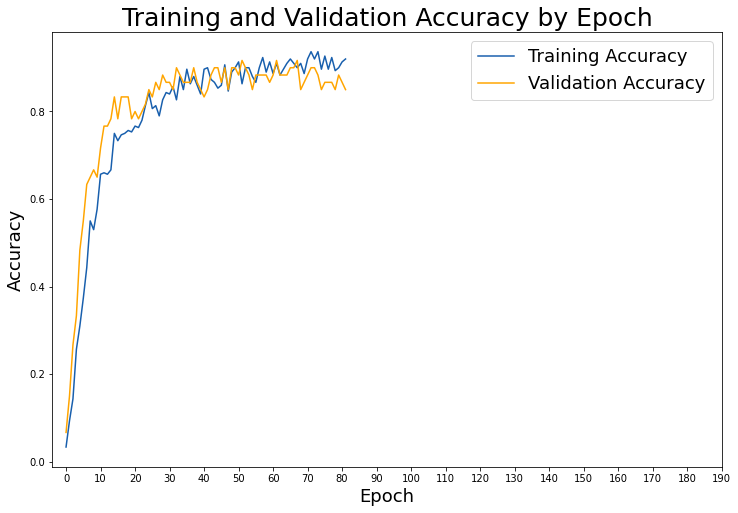

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing accuracy over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(0,200,10), range(0,200,10))

plt.legend(fontsize = 18)

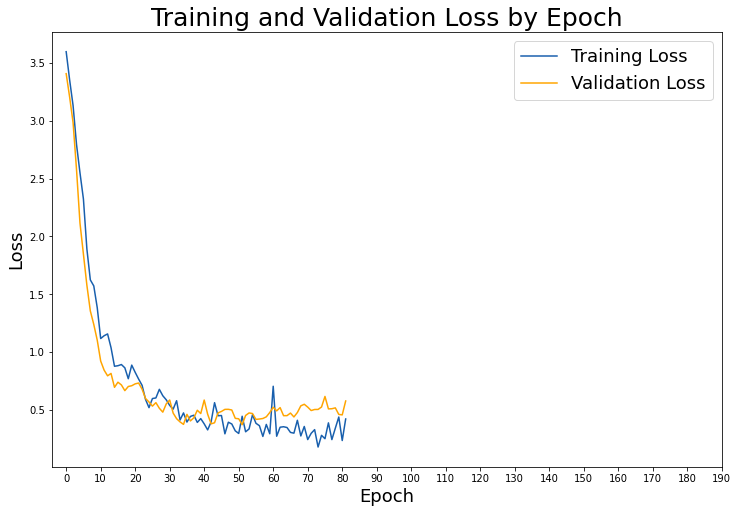

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Loss', color='#185fad')
plt.plot(val_accuracy, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Loss', fontsize = 18)
plt.xticks(range(0,200,10), range(0,200,10))

plt.legend(fontsize = 18)

In [ ]:
# Predictions from the test data
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=-1)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = np.argmax(y_test,axis=-1)

In [ ]:
print(y_test_pred)
print(y_test)

[23 23 22  2 20  3 25  4 31 33 28 27 26 24  9 24 31  6 18 23  8 27 33 22
 23 15  3  4 32 14  2 17  4 18  7 19 22 21  0  1 17 12 13 29 26 33 16 25
  8 20 28  5  5  2 26  5 14 31 21 31 23  4 16  4 14 29 10 33 14  9  0 33
 32  0 31  1  1  3 25  6 28 14 19 23 16 29  3 20 21 27 30  2 15  0 22 10]
[25 23 22 17 20 32 25  4 31 33 28 27 26 24  9 24 31  6 18 23  8 27 33 22
 23 15 21  4 32 14  2 17  4 18  7 19 22 21  0  1 17 12 13 29 26 33 16 25
  8 20 28  5  5  2 26  5 14 31 21 31 25  4 16  4 14 29 10 33 14  9  0 33
 32  0 31  1  1  3 25  6 28 14 19 23 16 29  3 20 21 27 30  2 15 11 22 10]


### Results

In [ ]:
false = 0
for i in range(0,len(y_test)):
  if y_test[i] != y_test_pred[i]:
    false+=1

print(false)

In [ ]:
# Checking model accuracy
acc = 1 - (false / len(y_test_pred))
print(acc)

0.9375


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 5]]


Text(0.5, 69.0, 'Predicted label')

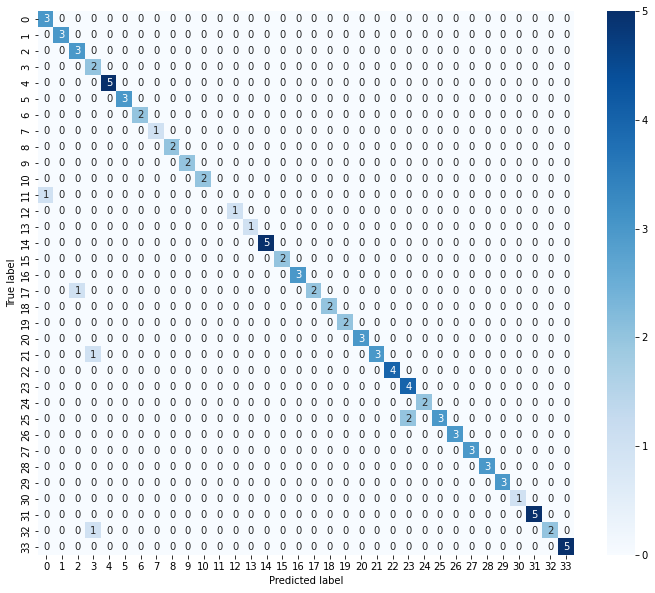

In [ ]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(12,10))
sns.heatmap(df_cm, annot=True, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17       1.00    